In [230]:
#import packages
import numpy as np
import pandas as pd

In [231]:
#read the csv file
df = pd.read_csv("/content/temperature_device_failure.csv")

In [232]:
#print the dataframe
print(df)

            timestamp      value
0       7/4/2013 0:00  69.880835
1       7/4/2013 1:00  71.220227
2       7/4/2013 2:00  70.877805
3       7/4/2013 3:00  68.959400
4       7/4/2013 4:00  69.283551
...               ...        ...
7262  5/28/2014 11:00  72.370206
7263  5/28/2014 12:00  72.172956
7264  5/28/2014 13:00  72.046565
7265  5/28/2014 14:00  71.825226
7266  5/28/2014 15:00  72.584089

[7267 rows x 2 columns]


In [233]:
df.head()

,timestamp,value
0,7/4/2013 0:00,69.880835
1,7/4/2013 1:00,71.220227
2,7/4/2013 2:00,70.877805
3,7/4/2013 3:00,68.959400
4,7/4/2013 4:00,69.283551


In [234]:
df.dropna()

,timestamp,value
0,7/4/2013 0:00,69.880835
1,7/4/2013 1:00,71.220227
2,7/4/2013 2:00,70.877805
3,7/4/2013 3:00,68.959400
4,7/4/2013 4:00,69.283551
...,...,...
7262,5/28/2014 11:00,72.370206
7263,5/28/2014 12:00,72.172956
7264,5/28/2014 13:00,72.046565
7265,5/28/2014 14:00,71.825226


In [235]:
import matplotlib.pyplot as plt

In [236]:
from datetime import datetime

In [237]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['date'] = df['timestamp'].dt.date
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

**1.**

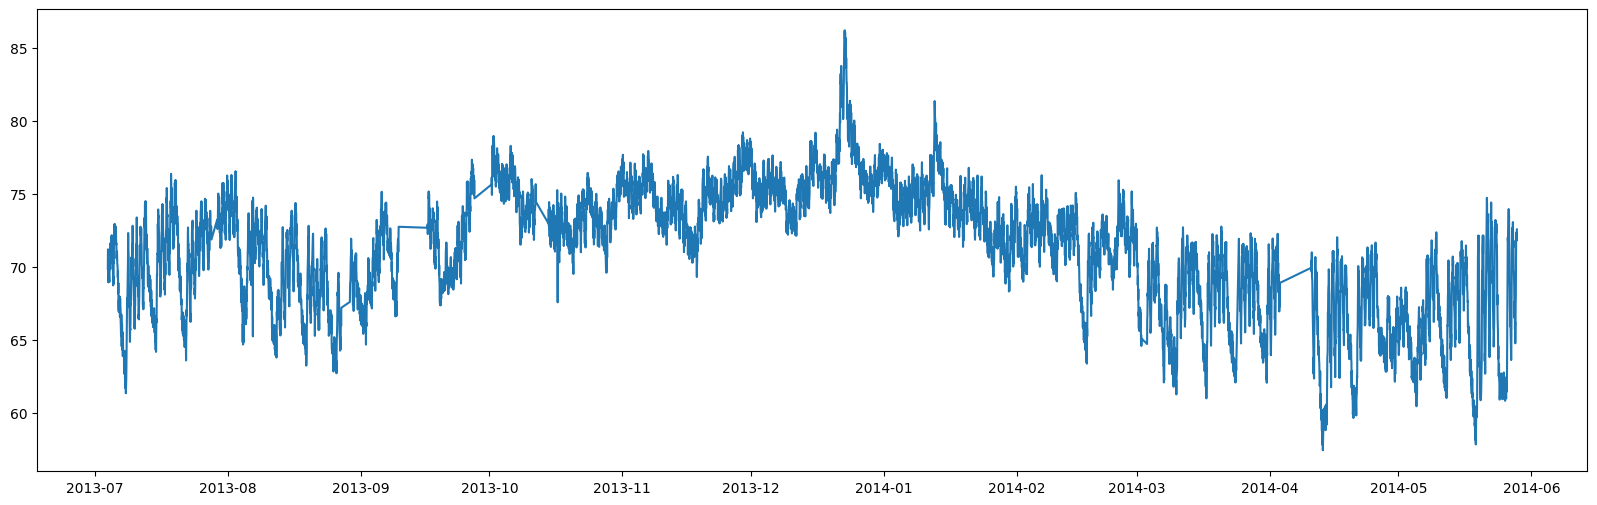

In [238]:
#plot the graph with actual data
plt.figure(figsize=(20, 6))
plt.plot(df.timestamp, df.value)

**2.**

In [239]:
#performed feature engineering
def WeekD(row):
  day = row['dayofweek']
  hour = row['hour']
  if (day < 5) and (6 < hour < 20):
    return "Weekday Day"
  elif (day < 5) and ((19 < hour) or (hour < 7)):
    return "Weekday Night"
  elif (day > 4) and (6 < hour < 20):
    return "Weekend Day"
  elif (day > 4) and ((19 < hour) or (hour < 7)):
    return "Weekend Night"

df['dtcat'] = df.apply(WeekD, axis=1)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
 2   day        7267 non-null   int64         
 3   dayofweek  7267 non-null   int64         
 4   hour       7267 non-null   int64         
 5   dtcat      7267 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 340.8+ KB


In [241]:
df.head(50)

,timestamp,value,day,dayofweek,hour,dtcat
0,2013-07-04 00:00:00,69.880835,4,3,0,Weekday Night
1,2013-07-04 01:00:00,71.220227,4,3,1,Weekday Night
2,2013-07-04 02:00:00,70.877805,4,3,2,Weekday Night
3,2013-07-04 03:00:00,68.959400,4,3,3,Weekday Night
4,2013-07-04 04:00:00,69.283551,4,3,4,Weekday Night
5,2013-07-04 05:00:00,70.060966,4,3,5,Weekday Night
6,2013-07-04 06:00:00,69.279765,4,3,6,Weekday Night
7,2013-07-04 07:00:00,69.369608,4,3,7,Weekday Day
8,2013-07-04 08:00:00,69.166714,4,3,8,Weekday Day
9,2013-07-04 09:00:00,68.986083,4,3,9,Weekday Day


In [242]:
df.head(100)

,timestamp,value,day,dayofweek,hour,dtcat
0,2013-07-04 00:00:00,69.880835,4,3,0,Weekday Night
1,2013-07-04 01:00:00,71.220227,4,3,1,Weekday Night
2,2013-07-04 02:00:00,70.877805,4,3,2,Weekday Night
3,2013-07-04 03:00:00,68.959400,4,3,3,Weekday Night
4,2013-07-04 04:00:00,69.283551,4,3,4,Weekday Night
...,...,...,...,...,...,...
95,2013-07-07 23:00:00,64.246634,7,6,23,Weekend Night
96,2013-07-08 00:00:00,62.480785,8,0,0,Weekday Night
97,2013-07-08 01:00:00,62.030554,8,0,1,Weekday Night
98,2013-07-08 02:00:00,63.411560,8,0,2,Weekday Night


In [243]:
# df['date'] = pd.to_datetime(df['date'])
# df['date'] = pd.to_numeric(df['date'])
# df['timestamp'] = pd.to_numeric(df['timestamp'])

#converted the dtype to numeric
df['value'] = pd.to_numeric(df['value'])

#converted the dtype to category
df['dtcat'] = pd.Categorical(df['dtcat'])

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
 2   day        7267 non-null   int64         
 3   dayofweek  7267 non-null   int64         
 4   hour       7267 non-null   int64         
 5   dtcat      7267 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 291.3 KB


In [245]:
from sklearn import preprocessing

In [246]:
# Encode categorical features
encoder = preprocessing.LabelEncoder()
# df['timestamp'] = encoder.fit_transform(df['timestamp'])
df['dtcat'] = encoder.fit_transform(df['dtcat'])

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
 2   day        7267 non-null   int64         
 3   dayofweek  7267 non-null   int64         
 4   hour       7267 non-null   int64         
 5   dtcat      7267 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 340.8 KB


**3(A)**

In [248]:
#apply Kmeans algorithm on specific features
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_values = list(range(2, 21))

# feature selection
df1=df[['dayofweek','hour']]

# Initialize a list to store the silhouette scores for each K value
silhouette_scores = []

# Loop through each K value
for k in k_values:
    # Fit the K-Means model to the data
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)

    # Calculate the silhouette score for the current K value
    score = silhouette_score(df1, kmeans.labels_)

    # Append the silhouette score to the list
    silhouette_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [249]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dayofweek  7267 non-null   int64
 1   hour       7267 non-null   int64
dtypes: int64(2)
memory usage: 113.7 KB


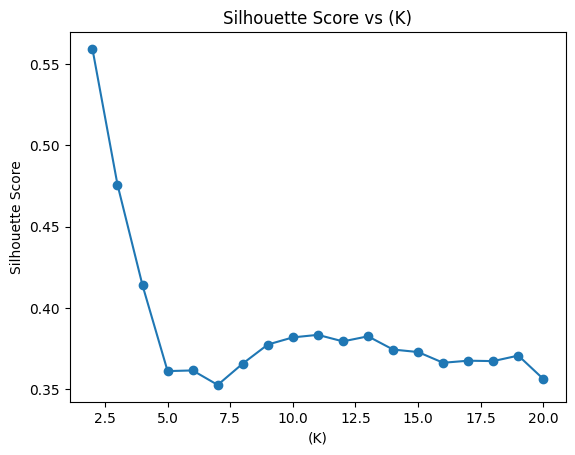

K 2.


In [250]:
# Plot the number of clusters (K)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('(K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs (K)')
plt.show()

# Find the K value with the highest silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

print(f'K {best_k}.')

**3(B)**

In [251]:
#implementing k-means again to find the inertia_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = list(range(1, 21))

# Initialize a list to store the inertia scores for each K value
inertia_scores = []

# Loop through each K value
for k in k_values:
    # Fit the K-Means model to the data
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)

    # Calculate the inertia score for the current K value
    score = kmeans.inertia_

    # Append the inertia score to the list
    inertia_scores.append(score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [252]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dayofweek  7267 non-null   int64
 1   hour       7267 non-null   int64
dtypes: int64(2)
memory usage: 113.7 KB


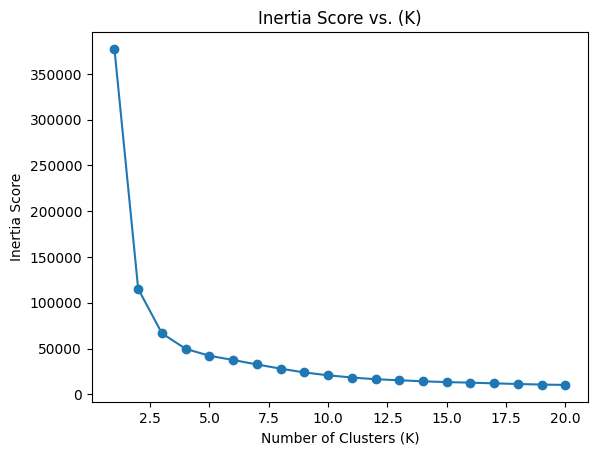

K 20.


In [253]:
# Plot the number of clusters (K) -
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia Score')
plt.title('Inertia Score vs. (K)')
plt.show()

best_k = k_values[inertia_scores.index(min(inertia_scores))]

print(f'K {best_k}.')

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
 2   day        7267 non-null   int64         
 3   dayofweek  7267 non-null   int64         
 4   hour       7267 non-null   int64         
 5   dtcat      7267 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 340.8 KB


**4.**

In [255]:
#import PCA
from sklearn.decomposition import PCA

# Apply PCA to derive the two features
df['timestamp'] = pd.to_numeric(df['timestamp'])

pca = PCA(n_components=2)
pca.fit(df)
pca_data = pca.transform(df)

kmeans = KMeans(n_clusters=best_k)
# kmeans.fit(pca.transform(df))
kmeans.fit(pca_data)

# Add the cluster labels to the DataFrame
df['cluster_label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


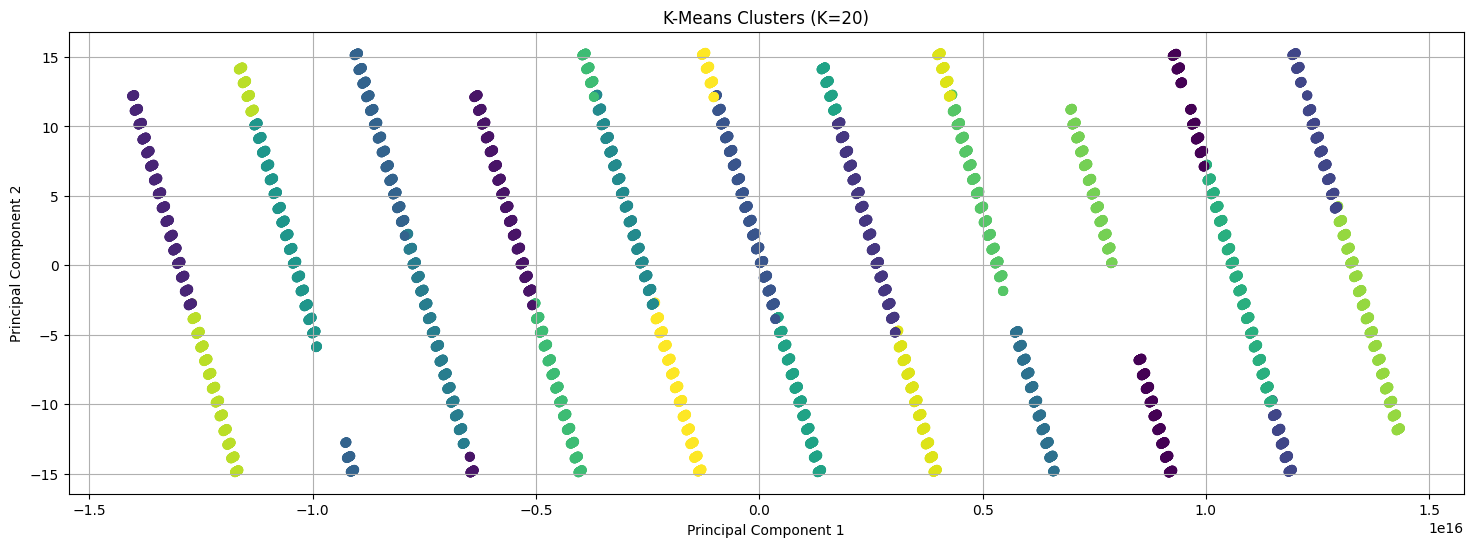

In [256]:
plt.figure(figsize=(18, 6))
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'K-Means Clusters (K={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [257]:
df

,timestamp,value,day,dayofweek,hour,dtcat,cluster_label
0,1372896000000000000,69.880835,4,3,0,1,6
1,1372899600000000000,71.220227,4,3,1,1,6
2,1372903200000000000,70.877805,4,3,2,1,6
3,1372906800000000000,68.959400,4,3,3,1,6
4,1372910400000000000,69.283551,4,3,4,1,6
...,...,...,...,...,...,...,...
7262,1401274800000000000,72.370206,28,2,11,0,19
7263,1401278400000000000,72.172956,28,2,12,0,19
7264,1401282000000000000,72.046565,28,2,13,0,19
7265,1401285600000000000,71.825226,28,2,14,0,19


In [258]:
# Identify outliers using the IQR method
Q1 = np.percentile(df['value'], 25)
Q3 = np.percentile(df['value'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_fraction1 = 0.01
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
outliers_fraction2 = len(outliers) / len(df)

In [259]:
#print the outlier fractions for further use in functions
print("Using 1%:", outliers_fraction1)
print("Using IQR method:", outliers_fraction2)

Using 1%: 0.01
Using IQR method: 0.004816292830604101


**5(A)**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


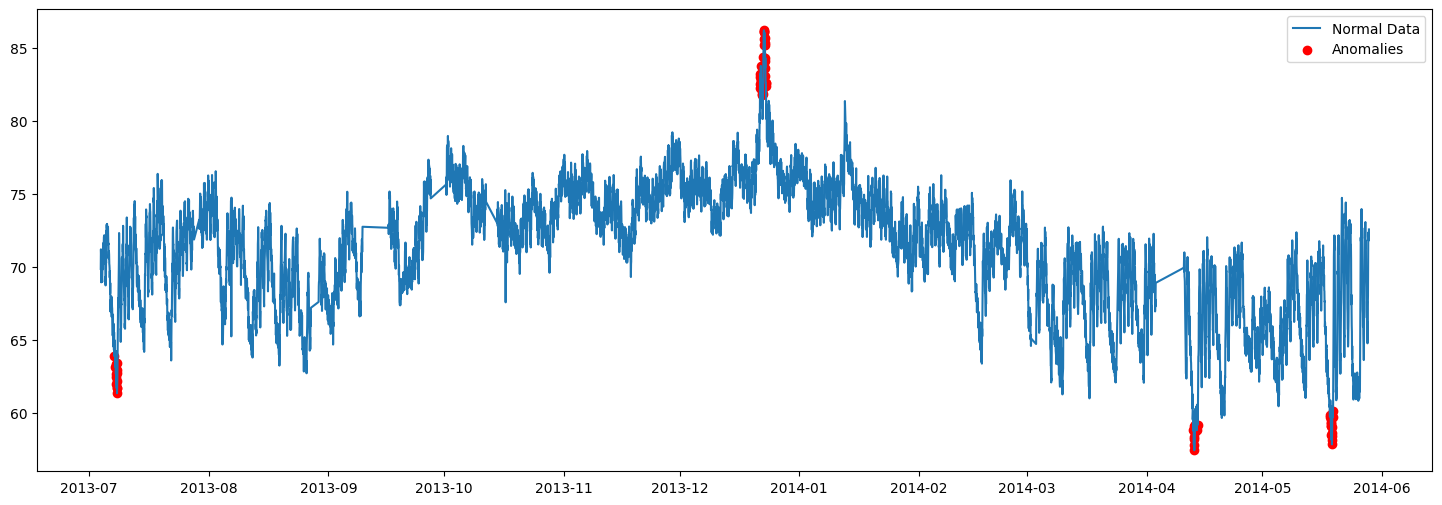

84     2013-07-07 12:00:00
91     2013-07-07 19:00:00
92     2013-07-07 20:00:00
94     2013-07-07 22:00:00
96     2013-07-08 00:00:00
               ...        
7036   2014-05-19 01:00:00
7037   2014-05-19 02:00:00
7038   2014-05-19 03:00:00
7040   2014-05-19 05:00:00
7042   2014-05-19 07:00:00
Name: timestamp, Length: 73, dtype: datetime64[ns] 84      63.913094
91      63.157082
92      63.386899
94      62.674789
96      62.480785
          ...    
7036    57.861906
7037    58.639295
7038    59.074691
7040    59.711858
7042    60.171092
Name: value, Length: 73, dtype: float64


In [260]:
#import Isolation Forest
from sklearn.ensemble import IsolationForest

#defined a function to isolation_forest for outliers_fraction1
def identify_anomalies_isolation_forest(df):
    outlier_detector = IsolationForest(contamination=outliers_fraction1)
    outlier_detector.fit(df[['timestamp', 'value']])
    outliers = outlier_detector.predict(df[['timestamp', 'value']])
    return outliers

# calling the function
outliers = identify_anomalies_isolation_forest(df)

#change the dtype to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the anomalies
plt.figure(figsize=(18, 6))
plt.plot(df['timestamp'], df['value'], label='Normal Data')
plt.scatter(df.loc[outliers == -1, 'timestamp'], df.loc[outliers == -1, 'value'], color='red', label='Anomalies')
plt.legend()
plt.show()

#print the outliers
print(df.loc[outliers == -1, 'timestamp'], df.loc[outliers == -1, 'value'])

**5(B)**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


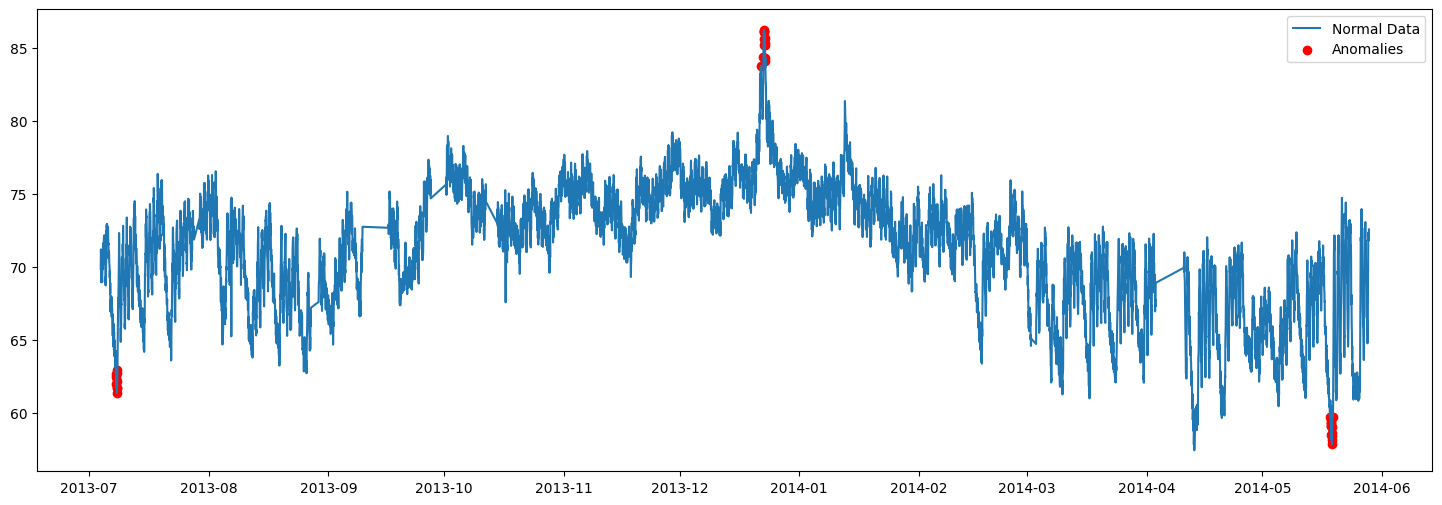

94     2013-07-07 22:00:00
96     2013-07-08 00:00:00
97     2013-07-08 01:00:00
99     2013-07-08 03:00:00
100    2013-07-08 04:00:00
101    2013-07-08 05:00:00
102    2013-07-08 06:00:00
103    2013-07-08 07:00:00
104    2013-07-08 08:00:00
3702   2013-12-22 01:00:00
3718   2013-12-22 17:00:00
3719   2013-12-22 18:00:00
3720   2013-12-22 19:00:00
3721   2013-12-22 20:00:00
3722   2013-12-22 21:00:00
3723   2013-12-22 22:00:00
3724   2013-12-22 23:00:00
3725   2013-12-23 00:00:00
3726   2013-12-23 01:00:00
3727   2013-12-23 02:00:00
3728   2013-12-23 03:00:00
3730   2013-12-23 05:00:00
7023   2014-05-18 12:00:00
7028   2014-05-18 17:00:00
7029   2014-05-18 18:00:00
7030   2014-05-18 19:00:00
7031   2014-05-18 20:00:00
7032   2014-05-18 21:00:00
7033   2014-05-18 22:00:00
7034   2014-05-18 23:00:00
7035   2014-05-19 00:00:00
7036   2014-05-19 01:00:00
7037   2014-05-19 02:00:00
7038   2014-05-19 03:00:00
7040   2014-05-19 05:00:00
Name: timestamp, dtype: datetime64[ns] 94      62.67478

In [261]:
#change the dtype to numeric
df['timestamp'] = pd.to_numeric(df['timestamp'])

#define isolation forest for outliers_fraction2
def identify_anomalies_isolation_forest_100(df):
    outlier_detector = IsolationForest(contamination=outliers_fraction2)
    outlier_detector.fit(df[['timestamp', 'value']])
    outliers = outlier_detector.predict(df[['timestamp', 'value']])
    return outliers

# calling the function
outliers = identify_anomalies_isolation_forest_100(df)

#change the dtype to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the anomalies
plt.figure(figsize=(18, 6))
plt.plot(df['timestamp'], df['value'], label='Normal Data')
plt.scatter(df.loc[outliers == -1, 'timestamp'], df.loc[outliers == -1, 'value'], color='red', label='Anomalies')
plt.legend()
plt.show()

#print the outliers
print(df.loc[outliers == -1, 'timestamp'], df.loc[outliers == -1, 'value'])

**6(A)**

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (73.505300049293396 > 73.403423478080015). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (73.522117031656634 > 73.392930647319091). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (73.522117031656634 > 73.381884274990654). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/usr/local/lib/python3

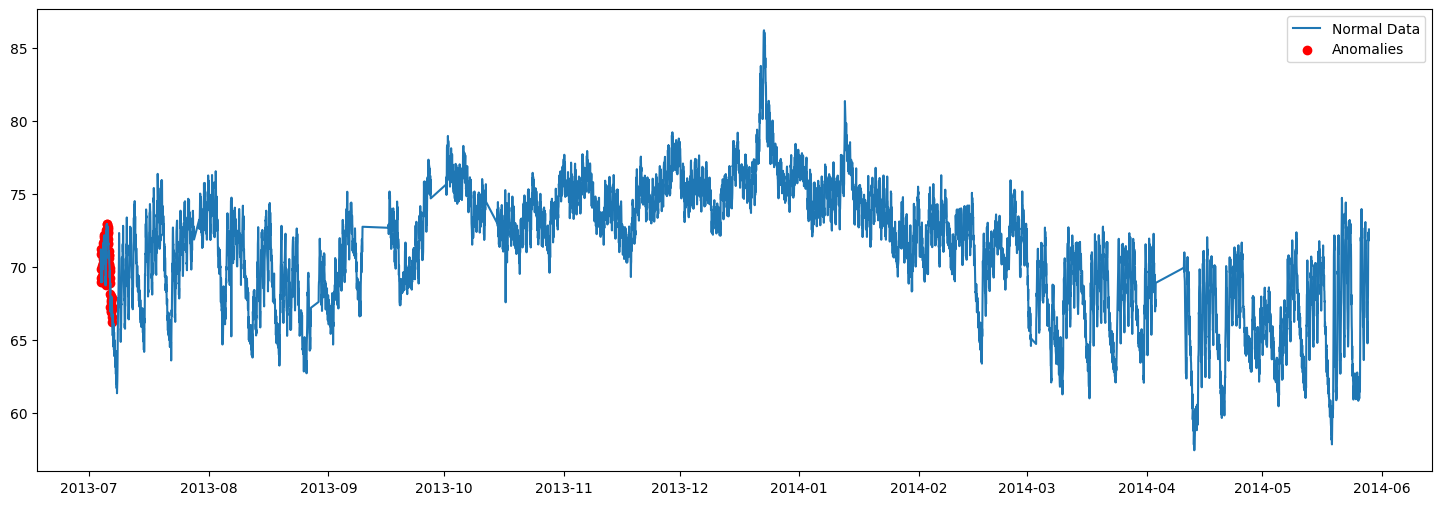

0    2013-07-04 00:00:00
1    2013-07-04 01:00:00
2    2013-07-04 02:00:00
3    2013-07-04 03:00:00
4    2013-07-04 04:00:00
             ...        
68   2013-07-06 20:00:00
69   2013-07-06 21:00:00
70   2013-07-06 22:00:00
71   2013-07-06 23:00:00
72   2013-07-07 00:00:00
Name: timestamp, Length: 73, dtype: datetime64[ns] 0     69.880835
1     71.220227
2     70.877805
3     68.959400
4     69.283551
        ...    
68    66.594079
69    67.868558
70    67.292201
71    67.163377
72    66.275684
Name: value, Length: 73, dtype: float64


In [262]:
#import EllipticEnvelope
from sklearn.covariance import EllipticEnvelope

#changing the dtype to numeric
df['timestamp'] = pd.to_numeric(df['timestamp'])

# Define Gaussian distribution (EllipticEnvelope) algorithm
def identify_anomalies_elliptic_envelope(df):
    outlier_detector = EllipticEnvelope(contamination=outliers_fraction1)
    outlier_detector.fit(df[['timestamp', 'value']])
    outliers = outlier_detector.predict(df[['timestamp', 'value']])
    return outliers

# Define a function to plot the anomalies
outliers = identify_anomalies_elliptic_envelope(df)

#changed the dtype agian to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

#plot the anomalies
plt.figure(figsize=(18, 6))
plt.plot(df['timestamp'], df['value'], label='Normal Data')
plt.scatter(df.loc[outliers == -1, 'timestamp'], df.loc[outliers == -1, 'value'], color='red', label='Anomalies')
plt.legend()
plt.show()

#print anomalies
print(df.loc[outliers == -1, 'timestamp'], df.loc[outliers == -1, 'value'])

**6(B)**

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (73.136570413964250 > 73.038543711837121). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (73.136570413964250 > 73.036203048295178). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (73.100708114427803 > 73.065910641519977). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/usr/local/lib/python3

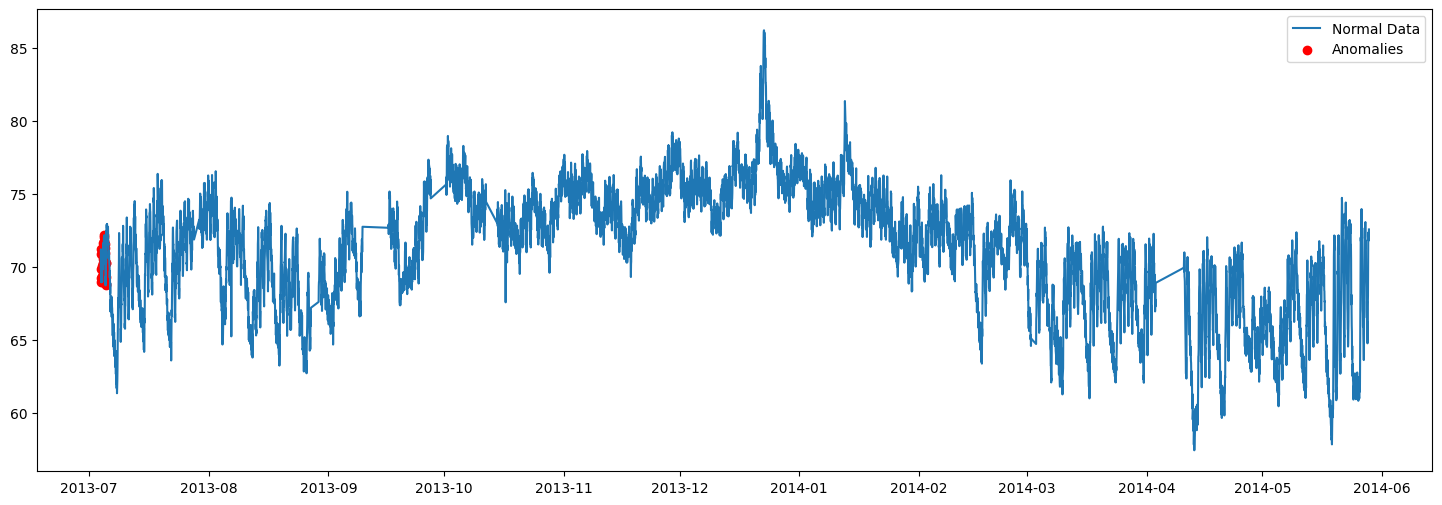

0    2013-07-04 00:00:00
1    2013-07-04 01:00:00
2    2013-07-04 02:00:00
3    2013-07-04 03:00:00
4    2013-07-04 04:00:00
5    2013-07-04 05:00:00
6    2013-07-04 06:00:00
7    2013-07-04 07:00:00
8    2013-07-04 08:00:00
9    2013-07-04 09:00:00
10   2013-07-04 10:00:00
11   2013-07-04 11:00:00
12   2013-07-04 12:00:00
13   2013-07-04 13:00:00
14   2013-07-04 14:00:00
15   2013-07-04 15:00:00
16   2013-07-04 16:00:00
17   2013-07-04 17:00:00
18   2013-07-04 18:00:00
19   2013-07-04 19:00:00
20   2013-07-04 20:00:00
21   2013-07-04 21:00:00
22   2013-07-04 22:00:00
23   2013-07-04 23:00:00
24   2013-07-05 00:00:00
25   2013-07-05 01:00:00
26   2013-07-05 02:00:00
27   2013-07-05 03:00:00
28   2013-07-05 04:00:00
29   2013-07-05 05:00:00
30   2013-07-05 06:00:00
31   2013-07-05 07:00:00
32   2013-07-05 08:00:00
33   2013-07-05 09:00:00
34   2013-07-05 10:00:00
Name: timestamp, dtype: datetime64[ns] 0     69.880835
1     71.220227
2     70.877805
3     68.959400
4     69.283551
5     

In [263]:
#change the dtype again to numeric
df['timestamp'] = pd.to_numeric(df['timestamp'])

# Define Gaussian distribution (EllipticEnvelope) algorithm
def identify_anomalies_elliptic_envelope_100(df):
    outlier_detector = EllipticEnvelope(contamination=outliers_fraction2)
    outlier_detector.fit(df[['timestamp', 'value']])
    outliers = outlier_detector.predict(df[['timestamp', 'value']])
    return outliers

# calling the function
outliers = identify_anomalies_elliptic_envelope_100(df)

#cahnged the dtype to datetime again to plot the graph
df['timestamp'] = pd.to_datetime(df['timestamp'])

#plot the anomaly
plt.figure(figsize=(18, 6))
plt.plot(df['timestamp'], df['value'], label='Normal Data')
plt.scatter(df.loc[outliers == -1, 'timestamp'], df.loc[outliers == -1, 'value'], color='red', label='Anomalies')
plt.legend()
plt.show()

#printt anommalies
print(df.loc[outliers == -1, 'timestamp'], df.loc[outliers == -1, 'value'])

**7.**Which of the two (2) models performs better on detecting anomalies?

**ANSWER-** We can't specify which one out of Gaussian distribution and Isolation Forest work better. As it totally depends on the nature of the dataset and feature, and dimension of data one is using. Although, the Isolation Forest is efficient and less time consuming because it creates multiple trees which makes it more stable in case of big datasets. Whereas, Gaussian uses a bell shaped normal distribution method.